# Assignment details #

Team: Harsh, Prasad, yashas
Date: 01/16/2022
Details: Run different ML models on the given dataset and compare 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import missingno as mi
from sklearn.linear_model import LogisticRegression

In [11]:
#### reading all three data files ####

data1 = pd.read_csv('data_interactions_1.csv')
data2 = pd.read_csv('data_interactions_2.csv')
data3 = pd.read_csv('diabetes.csv')

In [12]:
#### looking at the data ####

data1.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [13]:

X = data1.iloc[:,0:3]
X = sm.add_constant(X)
y = data1.iloc[:,3]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        16:45:58   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.000       2.789       4.265
youtube        0.0458      0.001     32.809      0.000       0.043       0.049
facebook       0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
##### model with interaction #####

data1['facebook_newspaper'] = data1.facebook * data1.newspaper
data1['facebook_youtube'] = data1.facebook * data1.youtube
data1['youtube_newspaper'] = data1.youtube * data1.newspaper

In [15]:
X = data1.loc[:, data1.columns != 'sales']
X = sm.add_constant(X)
y = data1.iloc[:,3]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     993.3
Date:                Sun, 16 Jan 2022   Prob (F-statistic):          3.68e-142
Time:                        16:45:58   Log-Likelihood:                -303.96
No. Observations:                 200   AIC:                             621.9
Df Residuals:                     193   BIC:                             645.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.7522      0.381     20.342      0.000       7.001       8.504
youtube                0.0203      0.002     12.633      0.000       0.017       0.024
facebook               0.0229      0.011      2.009      0.046       0.000       0.045
newspaper              0.0170      0.010      1.691      0.092      -0.003       0.037
facebook_newspaper -9.133e-05      0.000     -0.464      0.643      -0.000       0.000
facebook_youtube       0.0009   4.76e-05     19.930      0.000       0.001       0.001
youtube_newspaper  -6.643e-05   2.98e-05     -2.227      0.027      -0.000    -7.6e-06
==============================================================================
Omnibus:                      111.385   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.483
Skew:                          -2.046   Prob(JB):                    2.20e-167
Kurtosis:                      11.681   Cond. No.                     5.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Part 2 of the assignment #

In [16]:
data2.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


AxesSubplot(0.125,0.125;0.775x0.755)


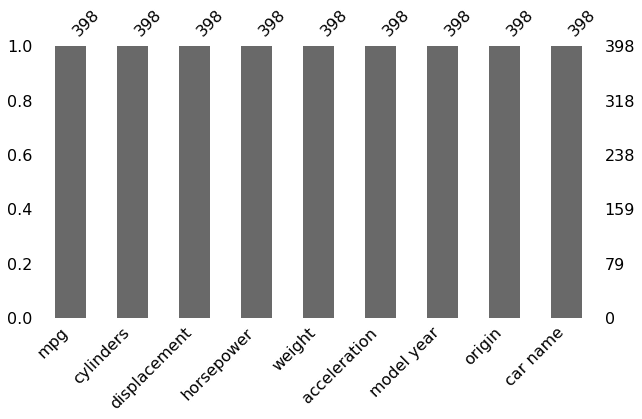

In [17]:
## plotting all the null values in each column ##

print(mi.bar(data2, figsize = (10,5)))

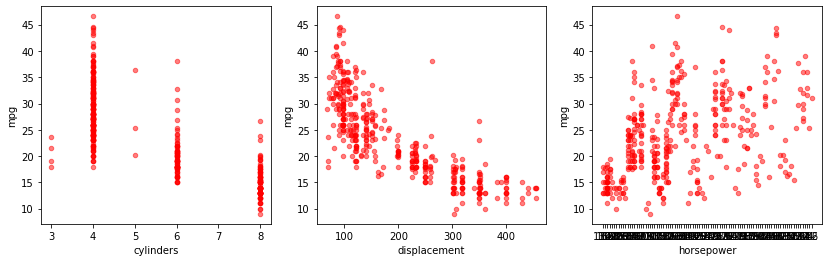

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

for xcol, ax in zip(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], axes):
    data2.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.5, color='r')

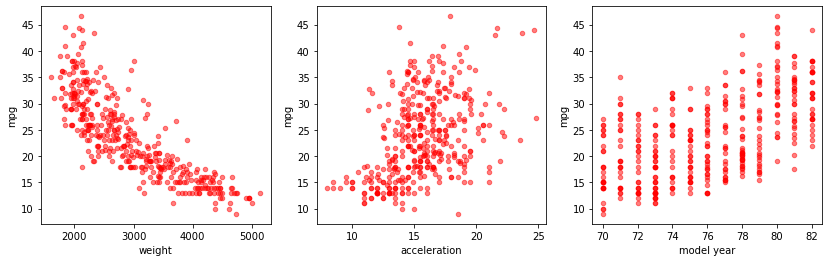

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

for xcol, ax in zip(['weight', 'acceleration', 'model year'], axes):
    data2.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.5, color='r')

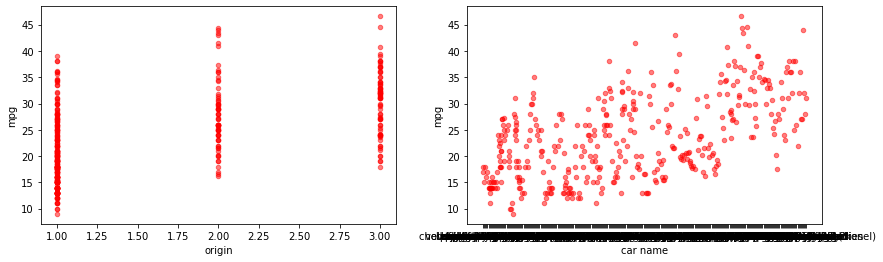

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

for xcol, ax in zip(['origin', 'car name'], axes):
    data2.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.5, color='r')

In [21]:
### calculating average horsepower values ####

partial = data2[data2['horsepower'] != '?']
partial['horsepower'] = partial['horsepower'].astype('int')
hp_data = partial.groupby(['car name']).agg({'horsepower':'mean'}).reset_index()

### replacing horsepower values ###

data2.loc[(data2['car name'] == "ford pinto") & (data2['horsepower'] == '?'), 'horsepower'] = 83.4 ### average for ford pinto 
data2.loc[(data2['car name'] == "ford maverick") & (data2['horsepower'] == '?'), 'horsepower'] = 81.5 ### average for ford maverick

#### removing the four null columns ###

data2 = data2[list(not i in ["renault lecar deluxe","ford mustang cobra", "renault 18i", "amc concord dl"] for i in list(data2['car name']))]

## changing the name of the column ###

data2.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'modelyear', 'origin', 'carname']

<ipython-input-21-6cac7dfe5bbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial['horsepower'] = partial['horsepower'].astype('int')


In [23]:
## changing data type ###

data2['origin'] = data2['origin'].astype('object')
data2['model year'] = data2['modelyear'].astype('object')
data2['cylinders'] = data2['cylinders'].astype('object')
data2['horsepower'] = data2['horsepower'].astype('int')

<ipython-input-23-25486d63bec4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['origin'] = data2['origin'].astype('object')
<ipython-input-23-25486d63bec4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['model year'] = data2['modelyear'].astype('object')
<ipython-input-23-25486d63bec4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [24]:
from statsmodels.formula.api import ols

fit = ols('mpg ~ weight + horsepower + displacement + acceleration + C(origin) + C(cylinders) +  C(modelyear) + C(carname)', data=data2).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     16.32
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           1.48e-30
Time:                        16:46:21   Log-Likelihood:                -529.71
No. Observations:                 394   AIC:                             1697.
Df Residuals:                      75   BIC:                             2966.
Df Model:                         318                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             34.1978      5.228      6.542      0.000      23.784      44.612
C(origin)[T.2]                                         2.5648      3.139      0.817      0.417      -3.689       8.818
C(origin)[T.3]                                         3.6232      3.164      1.145      0.256      -2.680       9.926
C(cylinders)[T.4]                                      9.4135      1.200      7.847      0.000       7.024      11.803
C(cylinders)[T.5]                                      6.5022      1.465      4.439      0.000       3.584       9.420
C(cylinders)[T.6]                                      7.0121      1.467      4.779      0.000       4.089       9.935
C(cylinders)[T.8]                                      7.4782      2.012      3.717      0.000       3.471      11.486
C(modelyear)[T.71]                                    -0.6735      1.085     -0.621      0.537      -2.835       1.488
C(modelyear)[T.72]                                    -2.0246      1.292     -1.567      0.121      -4.599       0.550
C(modelyear)[T.73]                                    -1.6484      1.138     -1.448      0.152      -3.916       0.619
C(modelyear)[T.74]                                    -0.3564      1.158     -0.308      0.759      -2.664       1.951
C(modelyear)[T.75]                                    -0.5300      1.239     -0.428      0.670      -2.998       1.938
C(modelyear)[T.76]                                     0.6019      1.249      0.482      0.631      -1.887       3.090
C(modelyear)[T.77]                                     2.8847      1.635      1.765      0.082      -0.372       6.141
C(modelyear)[T.78]                                     2.7029      1.526      1.771      0.081      -0.337       5.743
C(modelyear)[T.79]                                     4.4252      1.530      2.892      0.005       1.377       7.473
C(modelyear)[T.80]                                     5.5294      1.517      3.646      0.000       2.508       8.550
C(modelyear)[T.81]                                     3.5777      1.631      2.194      0.031       0.329       6.826
C(modelyear)[T.82]                                     5.8043      1.815      3.198      0.002       2.188       9.420
C(carname)[T.amc ambassador dpl]                       0.3727      3.203      0.116      0.908      -6.009       6.754
C(carname)[T.amc ambassador sst]                       2.6418      3.269      0.808      0.422      -3.870       9.154
C(carname)[T.amc concord]                             -2.0795      3.219     -0.646      0.520      -8.491       4.332
C(carname)[T.amc concord d/l]                         -1.8391      3.465     -0.531      0.597      -8.741  

In [25]:
fit = ols('mpg ~ weight + horsepower + displacement + acceleration + C(origin) + C(cylinders) +  C(modelyear)', data=data2).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sun, 16 Jan 2022   Prob (F-statistic):          3.54e-152
Time:                        16:46:25   Log-Likelihood:                -958.53
No. Observations:                 394   AIC:                             1963.
Df Residuals:                     371   BIC:                             2055.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.9589      2.352     13.163      0.000      26.334      35.584
C(origin)[T.2]         1.7124      0.512      3.342      0.001       0.705       2.720
C(origin)[T.3]         2.3126      0.493      4.695      0.000       1.344       3.281
C(cylinders)[T.4]      6.9395      1.533      4.528      0.000       3.926       9.953
C(cylinders)[T.5]      6.6249      2.331      2.842      0.005       2.041      11.209
C(cylinders)[T.6]      4.2970      1.701      2.526      0.012       0.951       7.643
C(cylinders)[T.8]      6.3496      1.963      3.234      0.001       2.489      10.210
C(modelyear)[T.71]     0.8640      0.805      1.074      0.284      -0.719       2.447
C(modelyear)[T.72]    -0.4910      0.802     -0.612      0.541      -2.068       1.086
C(modelyear)[T.73]    -0.5577      0.720     -0.775      0.439      -1.973       0.857
C(modelyear)[T.74]     1.2439      0.846      1.470      0.142      -0.420       2.907
C(modelyear)[T.75]     0.8609      0.835      1.031      0.303      -0.781       2.503
C(modelyear)[T.76]     1.4905      0.800      1.864      0.063      -0.082       3.063
C(modelyear)[T.77]     2.9956      0.818      3.663      0.000       1.387       4.604
C(modelyear)[T.78]     2.9712      0.777      3.823      0.000       1.443       4.500
C(modelyear)[T.79]     4.8931      0.823      5.948      0.000       3.275       6.511
C(modelyear)[T.80]     9.0547      0.873     10.373      0.000       7.338      10.771
C(modelyear)[T.81]     6.4533      0.861      7.491      0.000       4.759       8.147
C(modelyear)[T.82]     7.8394      0.847      9.253      0.000       6.173       9.505
weight                -0.0052      0.001     -8.323      0.000      -0.006      -0.004
horsepower            -0.0398      0.013     -3.086      0.002      -0.065      -0.014
displacement           0.0120      0.007      1.777      0.076      -0.001       0.025
acceleration          -0.0003      0.086     -0.003      0.997      -0.170       0.169
==============================================================================
Omnibus:                       33.164   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.417
Skew:                           0.531   Prob(JB):                     3.40e-13
Kurtosis:                       4.539   Cond. No.                     7.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
fit = ols('mpg ~ weight + horsepower + displacement + acceleration  + C(cylinders) +  C(modelyear)', data=data2).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sun, 16 Jan 2022   Prob (F-statistic):          2.31e-149
Time:                        16:46:27   Log-Likelihood:                -970.61
No. Observations:                 394   AIC:                             1983.
Df Residuals:                     373   BIC:                             2067.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             33.2071      2.366     14.034      0.000      28.554      37.860
C(cylinders)[T.4]      6.6264      1.552      4.268      0.000       3.574       9.679
C(cylinders)[T.5]      7.1614      2.337      3.064      0.002       2.565      11.758
C(cylinders)[T.6]      3.9786      1.738      2.290      0.023       0.562       7.396
C(cylinders)[T.8]      6.7179      2.008      3.345      0.001       2.769      10.667
C(modelyear)[T.71]     0.8553      0.824      1.038      0.300      -0.764       2.475
C(modelyear)[T.72]    -0.5352      0.821     -0.652      0.515      -2.149       1.078
C(modelyear)[T.73]    -0.4730      0.739     -0.640      0.522      -1.926       0.980
C(modelyear)[T.74]     1.3022      0.865      1.506      0.133      -0.398       3.003
C(modelyear)[T.75]     1.0042      0.854      1.175      0.241      -0.676       2.684
C(modelyear)[T.76]     1.5114      0.820      1.843      0.066      -0.101       3.124
C(modelyear)[T.77]     2.9295      0.835      3.510      0.001       1.288       4.571
C(modelyear)[T.78]     2.9206      0.792      3.688      0.000       1.363       4.478
C(modelyear)[T.79]     4.6415      0.839      5.530      0.000       2.991       6.292
C(modelyear)[T.80]     9.4195      0.884     10.650      0.000       7.680      11.159
C(modelyear)[T.81]     6.5929      0.868      7.594      0.000       4.886       8.300
C(modelyear)[T.82]     7.5208      0.849      8.856      0.000       5.851       9.191
weight                -0.0054      0.001     -8.568      0.000      -0.007      -0.004
horsepower            -0.0284      0.013     -2.182      0.030      -0.054      -0.003
displacement           0.0012      0.006      0.189      0.850      -0.012       0.014
acceleration           0.0061      0.088      0.069      0.945      -0.168       0.180
==============================================================================
Omnibus:                       34.214   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.591
Skew:                           0.516   Prob(JB):                     9.42e-15
Kurtosis:                       4.694   Cond. No.                     7.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
fit = ols('mpg ~ weight + horsepower + displacement + acceleration + C(cylinders) + C(carname)', data=data2).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.85e-28
Time:                        16:46:29   Log-Likelihood:                -639.77
No. Observations:                 394   AIC:                             1894.
Df Residuals:                      87   BIC:                             3114.
Df Model:                         306                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             36.3872      4.810      7.565      0.000      26.827      45.948
C(cylinders)[T.4]                                      7.2888      3.067      2.377      0.020       1.194      13.384
C(cylinders)[T.5]                                      9.4269      1.560      6.043      0.000       6.326      12.527
C(cylinders)[T.6]                                      3.6532      2.878      1.269      0.208      -2.067       9.373
C(cylinders)[T.8]                                      3.6488      3.071      1.188      0.238      -2.455       9.752
C(carname)[T.amc ambassador dpl]                       2.1336      3.720      0.574      0.568      -5.260       9.528
C(carname)[T.amc ambassador sst]                       1.9640      3.751      0.524      0.602      -5.492       9.420
C(carname)[T.amc concord]                              2.1714      3.766      0.577      0.566      -5.315       9.658
C(carname)[T.amc concord d/l]                          1.7063      4.056      0.421      0.675      -6.355       9.768
C(carname)[T.amc concord dl 6]                         2.5079      4.137      0.606      0.546      -5.715      10.731
C(carname)[T.amc gremlin]                             -0.3206      3.533     -0.091      0.928      -7.343       6.702
C(carname)[T.amc hornet]                               0.5768      3.471      0.166      0.868      -6.322       7.475
C(carname)[T.amc hornet sportabout (sw)]              -0.9023      4.161     -0.217      0.829      -9.172       7.368
C(carname)[T.amc matador]                             -0.0614      3.103     -0.020      0.984      -6.229       6.106
C(carname)[T.amc matador (sw)]                         1.4869      3.314      0.449      0.655      -5.100       8.073
C(carname)[T.amc pacer]                                0.6644      4.153      0.160      0.873      -7.591       8.920
C(carname)[T.amc pacer d/l]                           -0.1574      4.153     -0.038      0.970      -8.413       8.098
C(carname)[T.amc rebel sst]                            0.6170      3.751      0.164      0.870      -6.838       8.072
C(carname)[T.amc spirit dl]                            2.5581      4.650      0.550      0.584      -6.684      11.800
C(carname)[T.audi 100 ls]                             -0.8520      4.691     -0.182      0.856     -10.176       8.472
C(carname)[T.audi 100ls]                              -2.6348      4.295     -0.613      0.541     -11.171       5.902
C(carname)[T.audi 4000]                                8.5215      4.690      1.817      0.073      -0.801      17.844
C(carname)[T.audi 5000]                               -4.1569      2.264     -1.836      0.070      -8.657  

## Linear regression with interaction ##

In [28]:
fit = ols('mpg ~ weight + horsepower + displacement + acceleration + acceleration:weight + weight:horsepower + weight:displacement + cylinders:horsepower + C(cylinders) + C(carname)', data=data2).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     11.50
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.19e-27
Time:                        16:46:49   Log-Likelihood:                -618.99
No. Observations:                 394   AIC:                             1862.
Df Residuals:                      82   BIC:                             3103.
Df Model:                         311                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             34.5530     15.816      2.185      0.032       3.090      66.016
C(cylinders)[T.4]                                     20.4361      5.550      3.682      0.000       9.395      31.477
C(cylinders)[T.5]                                      4.4972      0.906      4.964      0.000       2.695       6.299
C(cylinders)[T.6]                                      3.8562      8.942      0.431      0.667     -13.932      21.644
C(cylinders)[T.8]                                      6.0368      9.699      0.622      0.535     -13.257      25.330
C(carname)[T.amc ambassador dpl]                       1.9439      3.658      0.531      0.597      -5.333       9.221
C(carname)[T.amc ambassador sst]                       2.3141      3.683      0.628      0.532      -5.013       9.641
C(carname)[T.amc concord]                              3.6202      3.762      0.962      0.339      -3.864      11.104
C(carname)[T.amc concord d/l]                          1.7605      4.485      0.392      0.696      -7.162      10.683
C(carname)[T.amc concord dl 6]                         4.5706      4.201      1.088      0.280      -3.787      12.928
C(carname)[T.amc gremlin]                              1.7739      3.797      0.467      0.642      -5.780       9.328
C(carname)[T.amc hornet]                               2.5722      3.640      0.707      0.482      -4.669       9.813
C(carname)[T.amc hornet sportabout (sw)]               0.5186      4.518      0.115      0.909      -8.469       9.506
C(carname)[T.amc matador]                              0.7317      3.123      0.234      0.815      -5.480       6.943
C(carname)[T.amc matador (sw)]                         0.7844      3.263      0.240      0.811      -5.707       7.276
C(carname)[T.amc pacer]                                2.7306      4.234      0.645      0.521      -5.692      11.153
C(carname)[T.amc pacer d/l]                            2.1232      4.296      0.494      0.623      -6.424      10.670
C(carname)[T.amc rebel sst]                            1.5852      3.695      0.429      0.669      -5.766       8.937
C(carname)[T.amc spirit dl]                            2.5873      4.570      0.566      0.573      -6.504      11.679
C(carname)[T.audi 100 ls]                              0.7794      4.672      0.167      0.868      -8.515      10.074
C(carname)[T.audi 100ls]                              -1.3477      4.249     -0.317      0.752      -9.801       7.106
C(carname)[T.audi 4000]                                9.7272      4.689      2.074      0.041       0.399      19.056
C(carname)[T.audi 5000]                               -8.7269      2.053     -4.251      0.000     -12.811  

## Logistic Regression ##

In [34]:
k = len(data3.columns)

### test data ##

X_test = data3.iloc[1:300,1:k-1]
Y_test = data3.iloc[1:300,k-1]

### train data ###

X_train = data3.iloc[1:300,1:k-1]
Y_train = data3.iloc[1:300,k-1]

logit_model = sm.Logit(Y_test, sm.add_constant(X_test)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.510454
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  299
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.2301
Time:                        16:59:17   Log-Likelihood:                -152.63
converged:                       True   LL-Null:                       -198.25
Covariance Type:            nonrobust   LLR p-value:                 6.862e-17
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.4692      1.071     -6.972      0.000      -9.569      -5.369
Glucose                      0.0283      0.006      4.922      0.000       0.017       0.040
BloodPressure               -0.0114      0.008     -1.375      0.169      -0.028       0.005
SkinThickness               -0.0024      0.011     -0.222      0.824      -0.023       0.019
Insulin                     -0.0014      0.001     -1.056      0.291      -0.004       0.001
BMI                          0.0869      0.022      3.911      0.000       0.043       0.130
DiabetesPedigreeFunction     1.0751      0.458      2.346      0.019       0.177       1.973
Age                          0.0298      0.013      2.223      0.026       0.004       0.056
============================================================================================
"""

In [43]:
df = pd.DataFrame(list(1 if i > 0.40 else 0 for i in list(logit_model.predict(sm.add_constant(X_train)))))
df = df.rename(columns = {0:'Prediction'})
prediction = df.groupby('Prediction')['Prediction'].count()
prediction
# prediction

Prediction
0    182
1    117
Name: Prediction, dtype: int64

In [44]:
pd.DataFrame(Y_train).groupby('Outcome')['Outcome'].count()

Outcome
0    186
1    113
Name: Outcome, dtype: int64